In [9]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

from datetime import datetime
from citipy import citipy

# Import API Key
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hermanus za
jibuti dj
albany au
albany au
pangnirtung ca
mataura pf
port elizabeth za
puerto ayora ec
rikitea pf
ponta do sol cv
muisne ec
san jose gt
puerto ayora ec
trairi br
narsaq gl
torbay ca
saskylakh ru
ushuaia ar
klaksvik fo
jamestown sh
sydney au
lazaro cardenas mx
atuona pf
ostrovnoy ru
srednekolymsk ru
east london za
chom bung th
beringovskiy ru
sangar ru
mataura pf
albany au
punta arenas cl
pau brasil br
avarua ck
lephepe bw
seddon nz
bredasdorp za
nanortalik gl
oga jp
rungata ki
hermanus za
esperance au
cape town za
kapaa us
punta arenas cl
khatanga ru
cherskiy ru
san pedro de uraba co
carballo es
ankazobe mg
tasiilaq gl
kitzingen de
chokurdakh ru
east london za
promysla ru
port alfred za
sola vu
tumannyy ru
blythe us
vetlanda se
newport us
moreira sales br
raga sd
utiroa ki
new norfolk au
ibra om
qasigiannguit gl
kapaa us
sovetskiy ru
arraial do cabo br
dzaoudzi yt
hobart au
kapaa us
rikitea pf
severo-kurilsk ru
rikitea pf
bambous virieux mu
cape town za
mataura pf
uruzga

san patricio mx
norman wells ca
tuktoyaktuk ca
illoqqortoormiut gl
biak id
okhotsk ru
sangar ru
kapaa us
vaini to
kuche cn
victor harbor au
east london za
arraial do cabo br
marawi sd
nouadhibou mr
biak id
vaini to
tecoanapa mx
paita pe
muriwai beach nz
cape town za
kodiak us
kapaa us
kodiak us
busselton au
hambantota lk
warri ng
mataura pf
salalah om
kodiak us
kyra ru
hobart au
ugoofaaru mv
wanning cn
amderma ru
saint-philippe re
grand river south east mu
ushuaia ar
mitchell us
upernavik gl
saint-pierre re
chuy uy
nguiu au
abu samrah qa
bara sd
ushuaia ar
nioro ml
new norfolk au
khatanga ru
tessalit ml
avarua ck
saint george bm
kvarkeno ru
flinders au
otradnoye ru
hilo us
sapao ph
hithadhoo mv
zhezkazgan kz
gimli ca
nadym ru
cockburn town bs
nizhniy odes ru
avarua ck
rikitea pf
kapit my
butaritari ki
faanui pf
bredasdorp za
cherskiy ru
busselton au
rikitea pf
longyearbyen sj
yellowknife ca
kapaa us
jamestown sh
airai pw
samusu ws
port alfred za
hilo us
saint-philippe re
rikitea pf
tom

ayan ru
faya td
illoqqortoormiut gl
tymovskoye ru
cutervo pe
port alfred za
khatanga ru
erseke al
flinders au
hilo us
falealupo ws
toftir fo
taolanaro mg
albany au
abomsa et
tasiilaq gl
murgab tm
qaanaaq gl
tabuk sa
busselton au
avarua ck
tautira pf
opuwo na
hermanus za
mana gf


In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | jibuti
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | pangnirtung
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | muisne
Processing Record 11 of Set 1 | san jose
Processing Record 12 of Set 1 | trairi
Processing Record 13 of Set 1 | narsaq
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | sydney
Processing Record 20 of Set 1 | lazaro cardenas
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | ostrovnoy
Processing Record 23 of Set 1 | srednekolymsk
Processing Record 24 of Set 1 | east london
Processin

Processing Record 41 of Set 4 | davila
Processing Record 42 of Set 4 | hammerfest
Processing Record 43 of Set 4 | qaanaaq
Processing Record 44 of Set 4 | portadown
Processing Record 45 of Set 4 | grand gaube
Processing Record 46 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 47 of Set 4 | tuatapere
Processing Record 48 of Set 4 | stornoway
Processing Record 49 of Set 4 | chizhou
Processing Record 50 of Set 4 | umea
Processing Record 1 of Set 5 | longyearbyen
Processing Record 2 of Set 5 | sand
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | mount gambier
Processing Record 6 of Set 5 | lebanon
Processing Record 7 of Set 5 | westport
Processing Record 8 of Set 5 | axim
Processing Record 9 of Set 5 | barcelos
Processing Record 10 of Set 5 | hobyo
Processing Record 11 of Set 5 | panaba
Processing Record 12 of Set 5 | gayny
Processing Record 13 of Set 5 | bhadrachalam
Processing Record 14 of Set 5

Processing Record 32 of Set 8 | pangody
Processing Record 33 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 34 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 35 of Set 8 | dillon
Processing Record 36 of Set 8 | causapscal
Processing Record 37 of Set 8 | duyun
Processing Record 38 of Set 8 | slave lake
Processing Record 39 of Set 8 | san patricio
Processing Record 40 of Set 8 | biak
Processing Record 41 of Set 8 | okhotsk
Processing Record 42 of Set 8 | kuche
City not found. Skipping...
Processing Record 43 of Set 8 | victor harbor
Processing Record 44 of Set 8 | nouadhibou
Processing Record 45 of Set 8 | tecoanapa
Processing Record 46 of Set 8 | muriwai beach
Processing Record 47 of Set 8 | hambantota
Processing Record 48 of Set 8 | warri
Processing Record 49 of Set 8 | salalah
Processing Record 50 of Set 8 | kyra
Processing Record 1 of Set 9 | ugoofaaru
Processing Record 2 of Set 9 | mitchell
Processing Record 3 of Set 9 | saint-pierr

Processing Record 16 of Set 12 | suruc
Processing Record 17 of Set 12 | kenora
Processing Record 18 of Set 12 | paamiut
Processing Record 19 of Set 12 | bela
Processing Record 20 of Set 12 | mbini
Processing Record 21 of Set 12 | grieskirchen
Processing Record 22 of Set 12 | clyde river
Processing Record 23 of Set 12 | baiyin
Processing Record 24 of Set 12 | port charlotte
Processing Record 25 of Set 12 | porto torres
Processing Record 26 of Set 12 | roberto payan
City not found. Skipping...
Processing Record 27 of Set 12 | vestbygda
City not found. Skipping...
Processing Record 28 of Set 12 | mto wa mbu
Processing Record 29 of Set 12 | kulhudhuffushi
Processing Record 30 of Set 12 | itoman
Processing Record 31 of Set 12 | nerchinskiy zavod
Processing Record 32 of Set 12 | ahuimanu
Processing Record 33 of Set 12 | krasnyy chikoy
Processing Record 34 of Set 12 | port hueneme
Processing Record 35 of Set 12 | itupiranga
Processing Record 36 of Set 12 | williams lake
Processing Record 37 o

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,66.90,87,3,9.15,ZA,2022-01-27 01:26:42
1,Jibuti,11.5000,42.5000,69.22,76,0,11.43,DJ,2022-01-27 01:26:42
2,Albany,42.6001,-73.9662,12.40,57,3,5.01,US,2022-01-27 01:24:19
3,Pangnirtung,66.1451,-65.7125,-22.83,97,100,4.09,CA,2022-01-27 01:22:42
4,Mataura,-46.1927,168.8643,57.47,42,53,7.31,NZ,2022-01-27 01:26:43
5,Port Elizabeth,-33.9180,25.5701,67.10,94,100,6.91,ZA,2022-01-27 01:26:44
6,Puerto Ayora,-0.7393,-90.3518,73.63,89,100,7.14,EC,2022-01-27 01:26:44
7,Rikitea,-23.1203,-134.9692,78.60,77,2,17.22,PF,2022-01-27 01:26:44
8,Ponta Do Sol,32.6667,-17.1000,60.71,69,59,6.06,PT,2022-01-27 01:26:45
9,Muisne,0.6000,-80.0333,76.95,87,16,5.30,EC,2022-01-27 01:26:45


In [18]:
# Reorder Columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

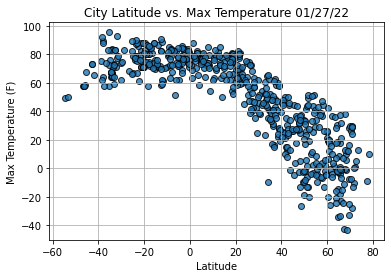

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

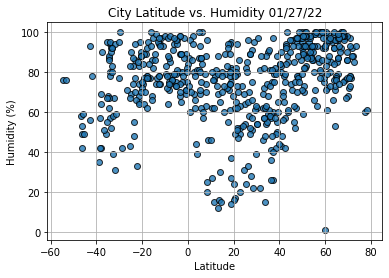

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

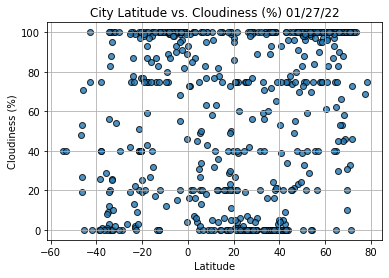

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

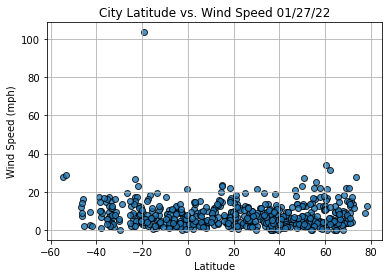

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()